В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [411]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

from sklearn.preprocessing import StandardScaler





In [412]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [413]:
cars_df = pd.read_csv("drive/MyDrive/machine_learning_for_people/linear_regression/cars.csv")

In [414]:
cars_df.head(20)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
5,6,Tata,Nexon,2019,35000,Petrol,Manual,First,17,1198,108,5,750000
6,7,Mahindra,Scorpio,2018,45000,Diesel,Automatic,Second,15,2179,140,7,900000
7,8,Volkswagen,Polo,2020,25000,Petrol,Automatic,First,18,999,76,5,650000
8,9,Audi,A4,2017,30000,Diesel,Automatic,First,18,1968,187,5,2200000
9,10,BMW,X1,2019,20000,Diesel,Automatic,Second,20,1995,190,5,2700000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [415]:
#Поглянемо на структуру і типи даних в нашому зборі даних
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [416]:
cars_df.shape

(100, 13)

In [417]:
# Унікальні значення для колонок типу object
unique_values = {col: cars_df[col].unique() for col in cars_df.select_dtypes(include='object').columns}
unique_values

{'Brand': array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
        'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object),
 'Model': array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
        'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
        'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
        'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
        'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
        'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
        'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
        'Camry', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5', '3 Series',
        'Innova Crysta', 'EcoSport'], dtype=object),
 'Fuel_Type': array(['Petrol', 'Diesel'], dtype=object),
 'Transmission': array(['Manual', 'Automatic'], dtype=object),
 'Owner_Type': array(['First', 'Second', 'Third'], dtype=object)}

In [418]:
# Кількість унікальних значень для категоріальних колонок
category_counts = {col: cars_df[col].nunique() for col in cars_df.select_dtypes(include='object').columns}
category_counts

{'Brand': 11, 'Model': 58, 'Fuel_Type': 2, 'Transmission': 2, 'Owner_Type': 3}

In [419]:
#Числові колонки
numerical_columns = cars_df.select_dtypes(include=['int64']).columns
print(numerical_columns)


Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')


In [420]:
len(numerical_columns)

8

In [421]:
#Категоріальні колонки
categorical_columns = cars_df.select_dtypes(include='object').columns
print(categorical_columns)

Index(['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')


In [422]:
len(categorical_columns)

5

Висновок:

В наборі даних 8 числових і 5 категоріальних колонок з них:
- 2 бінарні: ['Fuel_Type', 'Transmission']
- 2 мультикатегоріальних зі значеннями, для яких немає відношення порядку: ['Brand', 'Model']
- 1 мультикатегоріальна колонка ['Owner_Type'], в якій можна встановити відношення порядку ['Owner_Type'], де порядок може бути ['First', 'Second', 'Third']

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [423]:
from sklearn.model_selection import train_test_split

In [424]:
# Відокремлюємо ознаки X та цільову змінну y
X = cars_df.drop(columns=["Price"])  # Усі колонки, крім 'Price'
y = cars_df["Price"]

In [425]:
# Розділимо дані на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [426]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((80, 12), (20, 12), (80,), (20,))

Наш тренувальний набір (X_train) містить 80 зразків, кожен з них має 12 ознак, тестовий набір входів (X_test) містить 20 зразків, кожен з них також має 12 ознак. Тренувальний набір міток (y_train) містить 80 значень (по одному для кожного зразка в X_train). Tестовий набір міток (y_test) містить 20 значень (по одному для кожного зразка в X_test).

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [427]:
from sklearn.preprocessing import OneHotEncoder

# 1. Кодуємо бінарні колонкик Fuel_Type і Transmission

def binary_encode(column, X_train, X_test):
    # Знаходимо категорію, яка зустрічається частіше
    majority_value = X_train[column].mode()[0]
    # Додаємо закодовану колонку
    X_train[f"{column}_Encoded"] = (X_train[column] == majority_value).astype(int)
    X_test[f"{column}_Encoded"] = (X_test[column] == majority_value).astype(int)



In [428]:
binary_encode("Fuel_Type", X_train, X_test)
binary_encode("Transmission", X_train, X_test)

In [429]:
# 2. Кодування колонки 'Brand' за допомогою OneHotEncoder

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(X_train[["Brand"]])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [430]:
# Додаємо закодовані значення до наборів
brand_encoded_train = enc.transform(X_train[["Brand"]]).toarray()
brand_encoded_test = enc.transform(X_test[["Brand"]]).toarray()

In [431]:
enc.categories_[0]

array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)

In [432]:
# Додаємо закодовані колонки в X_train і X_test
X_train[enc.categories_[0]] = brand_encoded_train
X_test[enc.categories_[0]]  = brand_encoded_test

In [433]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [434]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Encoded,Transmission_Encoded,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Encoded,Transmission_Encoded,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

Ми бачимо, що після транспормацій колонки з бінарними значеннями Fuel_Type і Transmission містять лише 0 так 1.

Ми трансформували за допомогою OnrHotEncoder значення з колонки Brand у розріджену матрицю, де кожне значення перетворилося в бінарний вектор, який вказує на наявність категорії та за допомогою .toarray() — перетворили цю розріджену матрицю на щільний numpy масив, щоб зручніше було використовувати в моделях i додали закодовані значення в набори даних X_train, X_test.


Трансформуємо колонку Model у числову шляхом заміни назви моделі на середню ціну цієї моделі в нашому датасеті та додамо до X_train, X_test.

In [435]:
# Обчислюємо середню ціну для кожної моделі в основному датафреймі
model_avg_price = cars_df.groupby("Model")["Price"].mean()

# Додаємо нову колонку до X_train і X_test
X_train["Model_Avg_Price"] = X_train["Model"].map(model_avg_price)
X_test["Model_Avg_Price"] = X_test["Model"].map(model_avg_price)

# Перевіряємо результат
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Encoded,Transmission_Encoded,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Avg_Price
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1600000.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600000.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3200000.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,650000.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2500000.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Encoded,Transmission_Encoded,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Avg_Price
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1900000.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,450000.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,650000.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,850000.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,600000.0


(None, None)

Усі категоріальні колонки перетворені в числові і тепер можуть використовуватись для побудови моделі.

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [436]:
X_train_numerical = X_train.select_dtypes(include=[np.number])
X_test_numerical = X_test.select_dtypes(include=[np.number])

In [438]:
# Додаємо цільову змінну Price до числових колонок
data_with_y = pd.concat([X_train_numerical, y_train], axis=1)

In [439]:
# Створюємо матрицю кореляцій
correlation_matrix = data_with_y.corr()

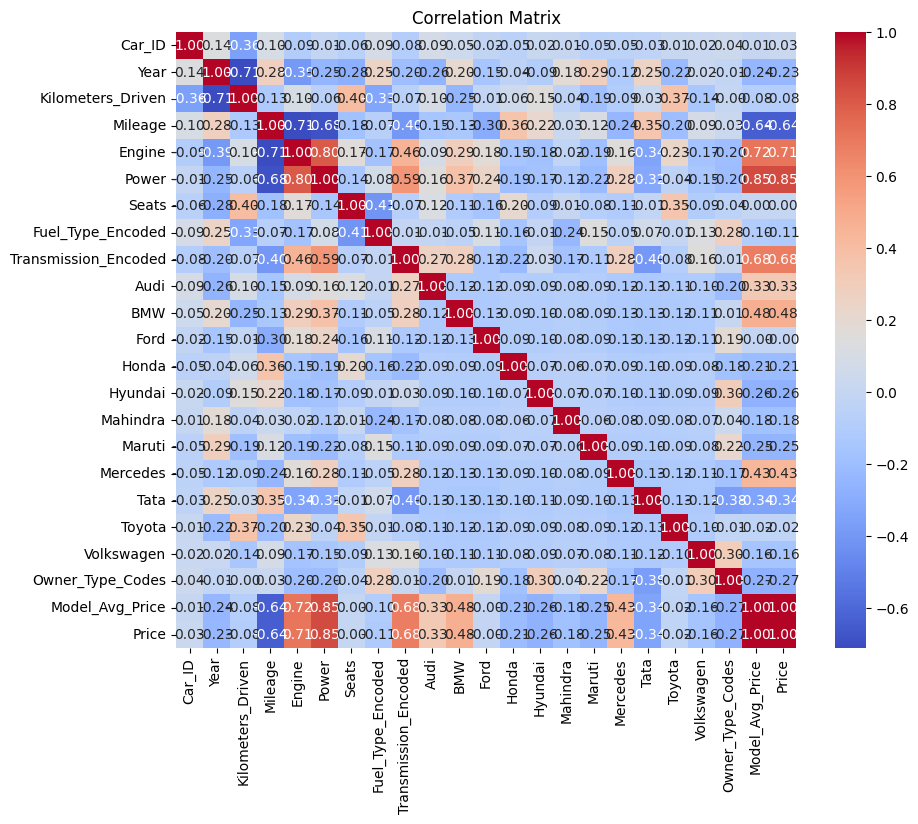

In [440]:
# Візуалізація матриці кореляцій
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [441]:
# Аналіз колонок з кореляцією > 0.5 за модулем з цільовою змінною
correlation_with_target = correlation_matrix['Price'].drop('Price')
high_correlation_features = correlation_with_target[correlation_with_target.abs() > 0.5]

In [442]:
print("Features with correlation > 0.5 (absolute) with Price:")
print(high_correlation_features)

Features with correlation > 0.5 (absolute) with Price:
Mileage                -0.638404
Engine                  0.710561
Power                   0.849137
Transmission_Encoded    0.680731
Model_Avg_Price         0.998440
Name: Price, dtype: float64


Аналіз кореляції між числовими колонками та ціною показує такі закономірності:

Ознака Mileage: Має досить сильну негативну кореляцію з ціною -0.638. Це означає, що автомобілі з вищим пробігом, як правило, дешевші.

Ознака Engine: Позитивна кореляція 0.711 вказує на те, що автомобілі з більшим об'ємом двигуна зазвичай мають вищу ціну.

Ознака Power: спостерігається найсильніша позитивна кореляція, що становить 0.849. Це свідчить, проо те, що потужність двигуна є основним фактором, який впливає на ціну автомобіля.

Transmission_Encoded: Позитивна кореляція 0.680731 означає, що тип трансмісії впливає на ціну автомобіля (наприклад, автоматичні трансмісії можуть бути дорожчими).


Ці ознаки є осовними предикторами, які можна використати для побудови моделі.

Model_Avg_Price 0.998440:цю змінну ми транформували з Model. Показує дуже сильну кореляцію, може бути потенційно проблемною.


**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [443]:
# Створюємо і тренуємо модель лінійної регресії
model = LinearRegression()
model.fit(X_train_numerical, y_train)

# Робимо передбачення на тренувальних і тестових даних
y_train_pred = model.predict(X_train_numerical)
y_test_pred = model.predict(X_test_numerical)


In [444]:
# Обчислимо RMSE для тренувальних і тестових даних
rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)

In [445]:
print(f"RMSE на тренувальних даних: {rmse_train:.2f}")
print(f"RMSE на тестових даних: {rmse_test:.2f}")

RMSE на тренувальних даних: 48287.07
RMSE на тестових даних: 28664.57


In [446]:
cars_df['Price'].mean()

1574000.0

In [447]:
cars_df['Price'].median()

1300000.0

RMSE на тренувальних даних становить 48287.07. Це середня похибка передбачень моделі на тих даних, на яких вона навчалась. В середньому модель відхиляється на близько 48287 від реальної ціни автомобіля в тренувальному наборі.

RMSE на тестових даних становить 28664.57. Це середня похибка передбачень моделі на даних, які не використовувались для навчання (нових для моделі).

Вищий RMSE на тренувальних даних (48,287.07) може бути сигналом, що модель працює краще на тестових даних, це може вказувати на те, що є деяке перенавчання.


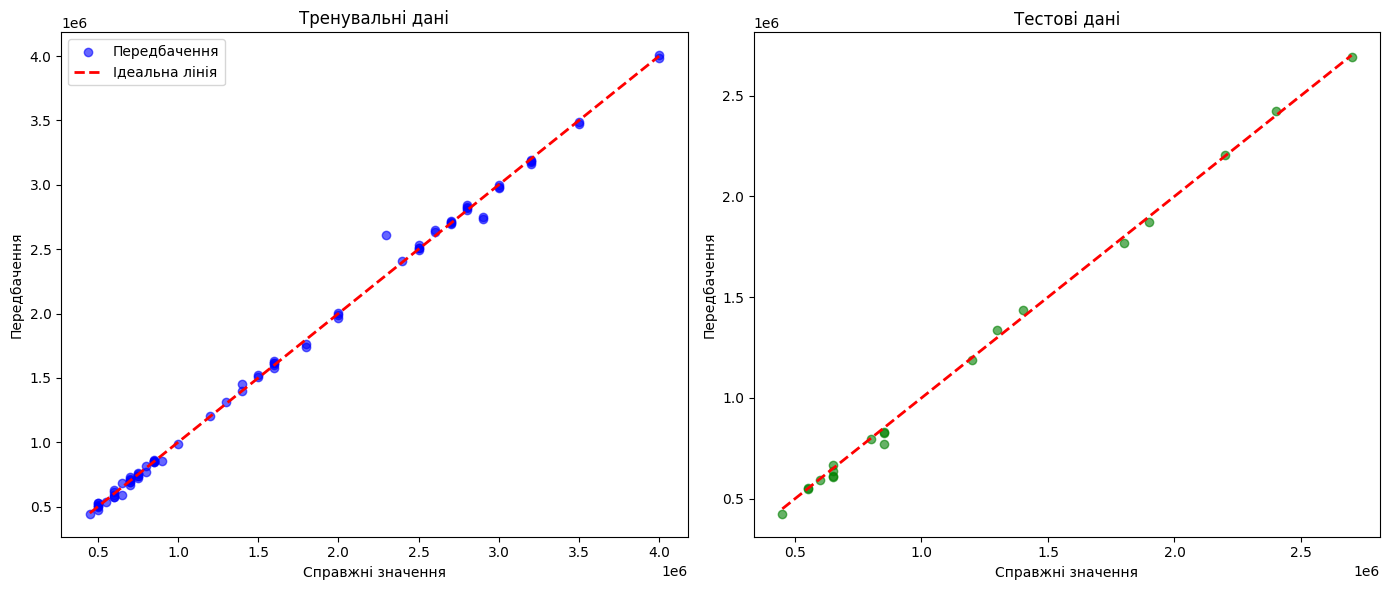

In [448]:
# Графік розсіювання передбачень проти реальних значень
plt.figure(figsize=(14, 6))

# Для тренувального набору
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6, color='blue', label="Передбачення")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2, label="Ідеальна лінія")
plt.title("Тренувальні дані")
plt.xlabel("Справжні значення")
plt.ylabel("Передбачення")
plt.legend()

# Для тестового набору
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Тестові дані")
plt.xlabel("Справжні значення")
plt.ylabel("Передбачення")

plt.tight_layout()
plt.show()


Тренувальні дані:

Більшість точок зосереджені близько до червоної лінії, що свідчить про те, що модель загалом добре працює на тренувальних даних.
Тестові дані:

Модель виявляє ознаки перенавчення.


**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [449]:
# Масштабування незалежних змінних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)

In [450]:
# Навчання моделі
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Аналіз коефіцієнтів
coefficients = model.coef_
feature_names = X_train_numerical.columns

In [451]:
# Формування таблиці результатів
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

In [452]:
# Виведення результатів
print("Коефіцієнти моделі:\n")
print(coef_df)

Коефіцієнти моделі:

                 Feature    Coefficient
21       Model_Avg_Price  998676.759474
5                  Power   55180.492032
4                 Engine  -40460.631523
7      Fuel_Type_Encoded  -38539.177202
3                Mileage  -18166.760459
20      Owner_Type_Codes   14800.093898
0                 Car_ID   14307.622619
18                Toyota   12085.640151
1                   Year   11285.642892
14              Mahindra  -10453.359064
11                  Ford   -7408.788527
9                   Audi    6641.603457
13               Hyundai   -6213.072150
6                  Seats   -6039.084375
17                  Tata    5453.563520
8   Transmission_Encoded    4501.953550
2      Kilometers_Driven   -3946.784664
19            Volkswagen   -3801.357938
12                 Honda    3582.024958
10                   BMW   -2775.481330
15                Maruti   -2351.918508
16              Mercedes    1542.382336


Розглянемо деякі з найвагоміших коефіцієнтів моделі:

Power: 55180.49

Чим більша потужність двигуна тим вища вартість автомобіля, що є логічним.

Engine:  -40,460.63
Напрям дії: Зменшує цільову змінну. Логічність: може здатися нелогічним, оскільки більший об'єм двигуна часто пов'язаний із вищою ціною. Але це може вказувати на багатоколінеарність із іншими ознаками (наприклад, потужністю), де вплив двигуна на ціну перекривається іншими змінними.

Mileage: -18,166.76
Напрям дії: Зменшує цільову змінну. Логічність: логічно, оскільки більший пробіг автомобіля зазвичай знижує його ринкову вартість.



**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [453]:
import statsmodels.api as sm

# Додаємо константу (intercept) до тренувальних даних
X_train_scaled_const = sm.add_constant(X_train_scaled)

X_train_scaled_const_df = pd.DataFrame(X_train_scaled_const, columns=['const'] + list(X_train_numerical.columns))
X_train_scaled_const_df.index = y_train.index

# Тренуємо модель
model_sm = sm.OLS(y_train, X_train_scaled_const_df).fit()

# Виводимо звіт моделі
print(model_sm.summary())

# Аналіз p-value
significant_features = model_sm.pvalues[model_sm.pvalues < 0.05].index.tolist()
print("Статистично значущі ознаки на рівні значущості 0.05:", significant_features)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1263.
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           2.12e-69
Time:                        01:57:30   Log-Likelihood:                -976.31
No. Observations:                  80   AIC:                             1997.
Df Residuals:                      58   BIC:                             2049.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.68e+06 

На основі звіту наступні ознаки є статистично значущими на рівні значущості 0.05:

'const', 'Engine', 'Power', 'Fuel_Type_Encoded', 'Model_Avg_Price'

R-squared: 0.998 — це дуже високий показник, який свідчить про те, що модель  на 99.8% пояснює варіацію цільової змінної Price на основі незалежних змінних.


В звіті також маємо повідомлення про те, що в моделі існує проблема з мультиколінеарністю,тобто є сильна кореляцію між деякими предикторами.

Обчислимо VIF (variance inflation factor) для кожної змінної.

In [454]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Обчислення VIF для початкових даних
def calculate_vif(data):
    """Функція для обчислення VIF"""
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data


In [455]:
vif_data = calculate_vif(X_train_scaled_const_df)
print(vif_data)

                 Feature        VIF
0                  const   1.000000
1                 Car_ID   1.521109
2                   Year   4.957497
3      Kilometers_Driven   5.856047
4                Mileage   4.843914
5                 Engine   7.095598
6                  Power  12.241245
7                  Seats   2.375948
8      Fuel_Type_Encoded   3.285610
9   Transmission_Encoded   2.881329
10                  Audi        inf
11                   BMW        inf
12                  Ford        inf
13                 Honda        inf
14               Hyundai        inf
15              Mahindra        inf
16                Maruti        inf
17              Mercedes        inf
18                  Tata        inf
19                Toyota        inf
20            Volkswagen        inf
21      Owner_Type_Codes   3.027277
22       Model_Avg_Price  23.807917


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [456]:
# Видалення змінних з високим VIF
def drop_high_vif_columns(data, drop_cols):
    """Функція для видалення колонок з високим VIF"""
    return data.drop(columns=drop_cols)

In [457]:
# Змінні для видалення через високий VIF або мультиколінеарність
drop_cols = ['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra',
             'Maruti', 'Mercedes', 'Tata', 'Toyota', 'Volkswagen']


In [458]:
# Видалення колонок
X_train_scaled_const_df1 = drop_high_vif_columns(X_train_scaled_const_df, drop_cols)


In [459]:
# Перерахунок VIF після видалення змінних
print("\nVIF після видалення колонок:")
vif_data = calculate_vif(X_train_scaled_const_df1)
print(vif_data)


VIF після видалення колонок:
                 Feature       VIF
0                  const  1.000000
1                 Car_ID  1.286416
2                   Year  2.961060
3      Kilometers_Driven  3.451217
4                Mileage  2.879871
5                 Engine  4.769958
6                  Power  7.534647
7                  Seats  1.734378
8      Fuel_Type_Encoded  1.767350
9   Transmission_Encoded  2.133351
10      Owner_Type_Codes  1.332116
11       Model_Avg_Price  5.942174


In [460]:
# Тренуємо модель
model_sm1 = sm.OLS(y_train, X_train_scaled_const_df1).fit()

# Виводимо звіт моделі
print(model_sm1.summary())

# Аналіз p-value
significant_features1 = model_sm1.pvalues[model_sm1.pvalues < 0.05].index.tolist()
print("Статистично значущі ознаки на рівні значущості 0.05:", significant_features1)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2626.
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           8.48e-85
Time:                        01:58:42   Log-Likelihood:                -979.27
No. Observations:                  80   AIC:                             1983.
Df Residuals:                      68   BIC:                             2011.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.68e+06 

У другій моделі вдалося значно знизити проблему мультиколінеарності, що підтверджується відсутністю ознак з високим рівнем колінеарності, про що свідчить значно кращий стан власних значень і менша кількість змінних із високими коефіцієнтами кореляції. Показник F-statistics покращився. Згідно звіту статистично значущі ознаки на рівні значущості 0.05:
'const', 'Car_ID', 'Engine', 'Power', 'Fuel_Type_Encoded', 'Model_Avg_Price'


**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [461]:
X_train_scaled_filtered = X_train_scaled_const_df[significant_features]

In [462]:
X_train_scaled_filtered

,const,Engine,Power,Fuel_Type_Encoded,Model_Avg_Price
83,1.0,-0.628491,-0.231967,0.975305,-0.077499
55,1.0,0.087196,0.247012,-1.025320,0.891241
26,1.0,0.111560,0.910213,0.975305,1.472484
54,1.0,-0.476217,-0.784634,0.975305,-0.997802
19,1.0,0.122219,0.910213,0.975305,0.794367
...,...,...,...,...,...
3,1.0,-1.009176,-1.140798,-1.025320,-1.046239
2,1.0,4.629524,2.801564,0.975305,0.923532
6,1.0,0.408494,-0.330219,-1.025320,-0.755617
27,1.0,0.128310,0.247012,-1.025320,1.084989


In [463]:
# Тренуємо модель
model_sm3 = sm.OLS(y_train, X_train_scaled_filtered).fit()

# Виводимо звіт моделі
print(model_sm3.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     6948.
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           1.61e-95
Time:                        01:58:57   Log-Likelihood:                -984.71
No. Observations:                  80   AIC:                             1979.
Df Residuals:                      75   BIC:                             1991.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   6193.19

R2 зменшився до 0.997 після того, як ми обрали лише статистично значущі змінні. Це може бути пов'язано з тим, що в нашому наборі даних були ознаки з високими значеннями VIF, що вказує на наявність мультиколінеарності між змінними. Коли змінні мають високу кореляцію між собою, це може призвести до штучного завищення R².

Оскільки деякі змінні з високими VIF були виключені з моделі в процесі відбору лише статистично значущих ознак, це могло призвести до зниження значення R2. Зниження мультиколінеарності допомогло створити більш стабільну та надійну модель, хоча це призвело до незначного зменшення R², оскільки була видалена частина змінних, що мали високий ступінь взаємозв'язку з іншими ознаками.


Коригований R2 залишився без змін і становить 0.997. Це вказує на те, що хоча ми зменшили кількість змінних, коригований R2 не знизився, що є позитивним показником, оскільки модель не втратила в точності при видаленні менш значущих змінних.


F-statistics значно збільшився, що свідчить про покращення загальної статистичної значущості моделі після обмеження змінними, які є значущими. Це означає, що обрана підмножина змінних краще вказує на взаємозв'язок з залежною змінною (ціною).


**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [464]:
significant_features_0_25 = model_sm.pvalues[model_sm.pvalues < 0.25].index.tolist()
print("Статистично значущі ознаки на рівні значущості 0.25:", significant_features_0_25)

Статистично значущі ознаки на рівні значущості 0.25: ['const', 'Car_ID', 'Mileage', 'Engine', 'Power', 'Fuel_Type_Encoded', 'Mahindra', 'Toyota', 'Owner_Type_Codes', 'Model_Avg_Price']


In [465]:
X_train_scaled_const_0_25_df = X_train_scaled_const_df[significant_features_0_25]

In [466]:
# Тренуємо модель
model_sm4 = sm.OLS(y_train, X_train_scaled_const_0_25_df).fit()

# Виводимо звіт моделі
print(model_sm4.summary())



                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3326.
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           2.02e-88
Time:                        01:59:08   Log-Likelihood:                -979.00
No. Observations:                  80   AIC:                             1978.
Df Residuals:                      70   BIC:                             2002.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   5968.68

R2 збільшився до 0.998 після того, як ми обрали лише статистично значущі змінні на рівні значущості 0.25.


Коригований R2 залишився без змін і становить 0.997. Це вказує на те, що хоча ми зменшили кількість змінних, коригований R2 не знизився, що є позитивним показником, оскільки модель не втратила в точності при видаленні менш значущих змінних.


На мій погляд модель model_sm3, де ми обрали статистично значущі змінні на рівні значущості 0.5 є найбільш привабливою для використання:

Вона включає тільки найважливіші змінні з низьким p-value (Engine, Power, Fuel_Type_Encoded, Model_Avg_Price).

Має найменшу складність.


Показники R2 і Adjusted R2 досить хороші для такої простої моделі.
Менше ознак означає меншу ймовірність мультиколінеарності і кращу інтерпретацію результатів.

